#
1. Load the data and libraries
2. EDA
3. Data Preparation
4. Time Series Decomposition
    1.Trend Component
    2.Seasonal Component
    3.Irregular Component
5.Check for stationarity (Augmented Dicky Fuller Test)
6. Moving Average
7.Exponential Smoothing Heat and Waves
8.Arima,Arima and Prophet




# Import the libraries

In [ ]:
!unzip '/content/165899276823660ec2379f8793842aa5b168a_ (1).zip'

unzip:  cannot find or open /content/165899276823660ec2379f8793842aa5b168a_ (1).zip, /content/165899276823660ec2379f8793842aa5b168a_ (1).zip.zip or /content/165899276823660ec2379f8793842aa5b168a_ (1).zip.ZIP.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose


In [ ]:
data = pd.read_csv('/content/Super_Store.csv',encoding = 'cp1252')

In [ ]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [ ]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
cols_select = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit']

In [ ]:
data_sales = data.drop(cols_select, axis = 1)

In [ ]:
data_sales.head()             #We need just the time series data and the sales(to forecast the sales)

,Order Date,Sales
0,11/8/2016,261.9600
1,11/8/2016,731.9400
2,10/11/2015,957.5775
3,6/9/2014,48.8600
4,6/9/2014,1706.1840


In [ ]:
data_sales = data_sales.sort_values('Order Date')

In [ ]:
data_sales.head()

,Order Date,Sales
845,1/1/2017,474.430
1707,1/1/2017,141.420
1708,1/1/2017,310.744
179,1/1/2017,48.896
181,1/10/2014,51.940


In [ ]:
data_sales["Order Date"] = pd.to_datetime(data_sales["Order Date"])

In [ ]:
print(data_sales['Order Date'].min())
print(data_sales['Order Date'].max())

2014-01-06 00:00:00
2017-12-30 00:00:00


In [ ]:
data_sales =  data_sales.set_index('Order Date')

In [ ]:
data_sales

,Sales
Order Date,
2017-01-01,474.430
2017-01-01,141.420
2017-01-01,310.744
2017-01-01,48.896
2014-01-10,51.940
...,...
2017-09-09,66.112
2017-09-09,243.920
2017-09-09,17.024


In [ ]:
data_sales = data_sales['Sales'].resample('MS').mean()

In [ ]:
data_sales

Order Date
2014-01-01    312.126250
2014-02-01    262.808286
2014-03-01    441.635030
2014-04-01    305.570654
2014-05-01    288.032792
2014-06-01    440.204187
2014-07-01    327.910636
2014-08-01    305.014437
2014-09-01    425.294300
2014-10-01    384.507719
2014-11-01    347.820527
2014-12-01    414.134682
2015-01-01    782.662773
2015-02-01    284.943091
2015-03-01    446.420821
2015-04-01    317.445409
2015-05-01    312.498350
2015-06-01    296.699192
2015-07-01    341.860500
2015-08-01    301.206006
2015-09-01    437.883717
2015-10-01    334.072875
2015-11-01    401.049773
2015-12-01    360.715925
2016-01-01    346.488318
2016-02-01    206.607947
2016-03-01    312.221756
2016-04-01    377.488286
2016-05-01    351.624070
2016-06-01    343.962421
2016-07-01    335.090231
2016-08-01    430.456286
2016-09-01    328.468445
2016-10-01    247.345354
2016-11-01    392.390479
2016-12-01    436.651369
2017-01-01    248.501333
2017-02-01    264.089900
2017-03-01    286.669600
2017-04-01    

In [ ]:
data_sales.describe()

count     48.000000
mean     346.478737
std       89.859062
min      206.044502
25%      300.079303
50%      334.581553
75%      386.478409
max      782.662773
Name: Sales, dtype: float64

<Axes: xlabel='Order Date'>

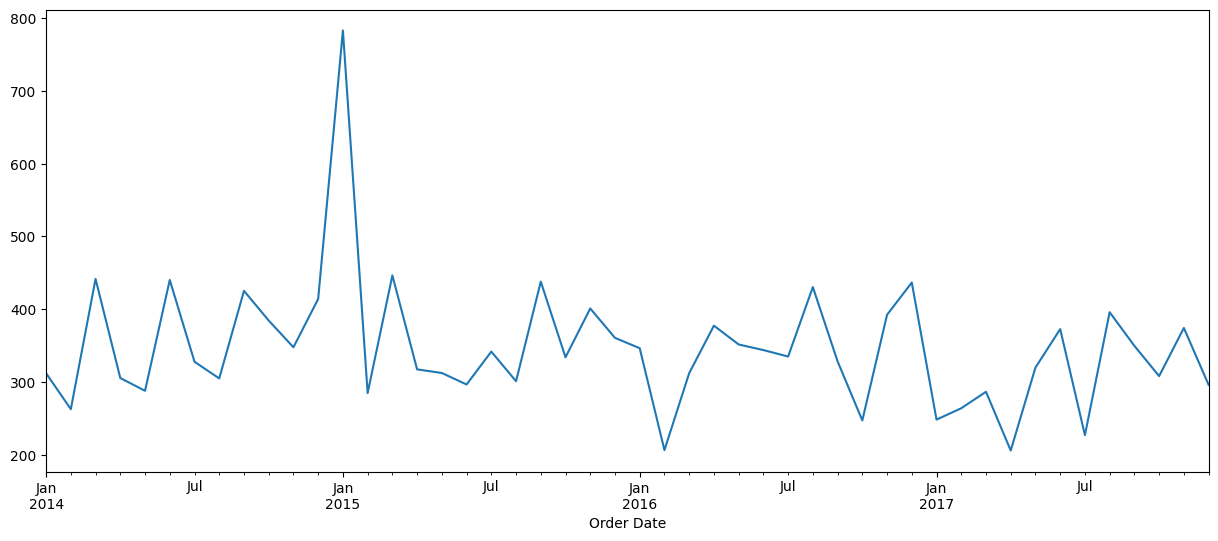

In [ ]:
data_sales.plot(figsize=(15,6))

Seasonal Decompose

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
series = data_sales
result = seasonal_decompose(series, model='additive')
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

Order Date
2014-01-01           NaN
2014-02-01           NaN
2014-03-01           NaN
2014-04-01           NaN
2014-05-01           NaN
2014-06-01           NaN
2014-07-01    374.193980
2014-08-01    394.721952
2014-09-01    395.843644
2014-10-01    396.537833
2014-11-01    398.052013
2014-12-01    393.092036
2015-01-01    387.693906
2015-02-01    388.116466
2015-03-01    388.482340
2015-04-01    386.905447
2015-05-01    387.021881
2015-06-01    387.013984
2015-07-01    366.614267
2015-08-01    345.176367
2015-09-01    336.320775
2015-10-01    333.230934
2015-11-01    337.362959
2015-12-01    340.962498
2016-01-01    342.649705
2016-02-01    347.753039
2016-03-01    348.579497
2016-04-01    340.406881
2016-05-01    336.432430
2016-06-01    339.235603
2016-07-01    338.316789
2016-08-01    336.629079
2016-09-01    337.959488
2016-10-01    329.751323
2016-11-01    321.288243
2016-12-01    321.166778
2017-01-01    317.868371
2017-02-01    311.933890
2017-03-01    311.382148
2017-04-01    

Plot the seasonal Decompose

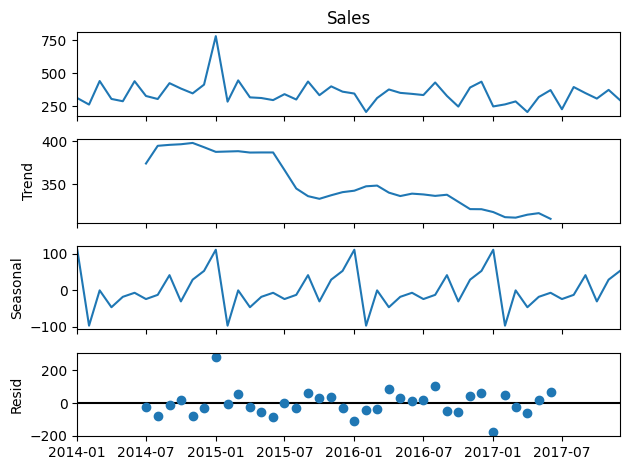

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
series = data_sales
result = seasonal_decompose(series, model='additive')
result.plot()
plt.show()

Augmented Dickey Fuller Test

Null Hypothesis : Data is not stationary
Alternate Hypothesis: Data is stationary

In [ ]:
adf_test = adfuller(data_sales)


In [ ]:
adf_test

(-6.962405221214863,
 9.09339851000658e-10,
 0,
 47,
 {'1%': -3.5778480370438146,
  '5%': -2.925338105429433,
  '10%': -2.6007735310095064},
 446.50775372117755)

In [ ]:
print("ADF Statistics :%f" %adf_test[0]) #f means float
print("p-value :%f" %adf_test[1])

ADF Statistics :-6.962405
p-value :0.000000


Auto-Correlation Plot

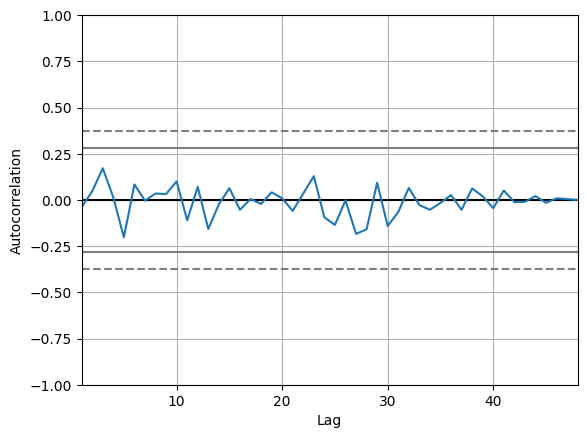

In [ ]:
#To check for autocorrelation in data
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data_sales)
plt.show()

In [ ]:
#It has little autocorrelation

Moving Average

<Axes: xlabel='Order Date'>

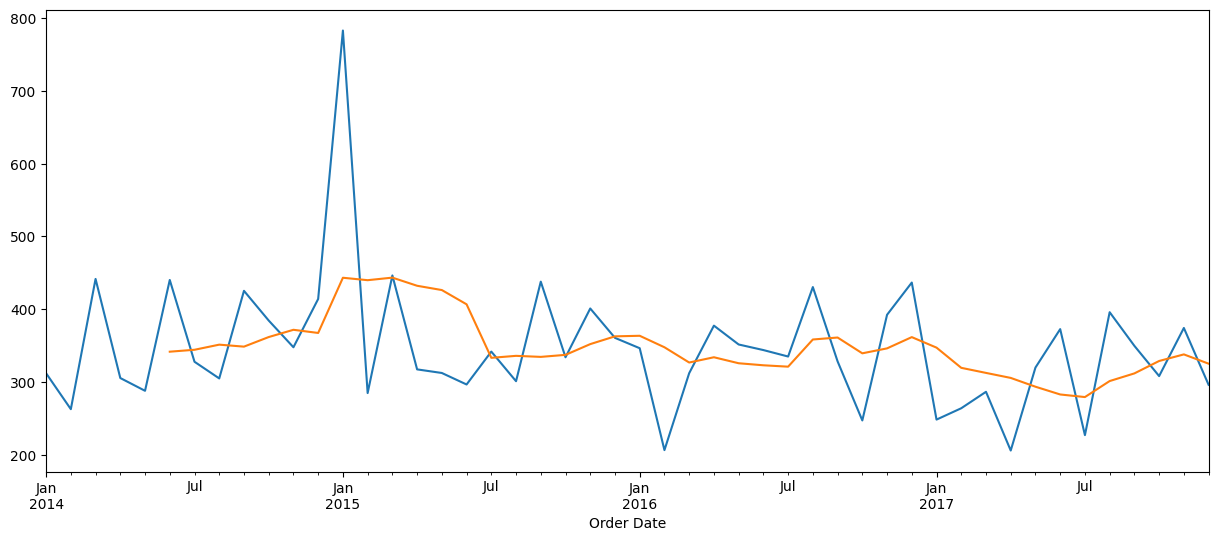

In [ ]:
data_sales_MA = data_sales.rolling(window=6).mean()
data_sales.plot(figsize=(15,6))
data_sales_MA.plot(figsize=(15,6))

Exponential Smoothing

2018-01-01    327.218973
Freq: MS, dtype: float64


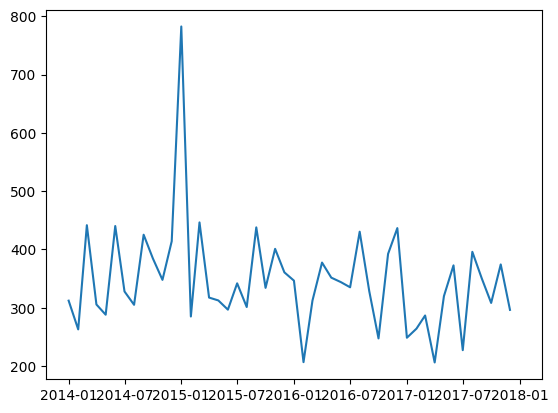

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing,SimpleExpSmoothing, Holt
#Simple Exponential Smoothing
#fit model
model = SimpleExpSmoothing(data_sales)
model_fit = model.fit()
#make prediction
yhat = model_fit.predict(len(data_sales))
print(yhat)
#plot
plt.plot(data_sales)
plt.plot(yhat,color='red')
plt.show()

2018-01-01    370.132397
Freq: MS, dtype: float64


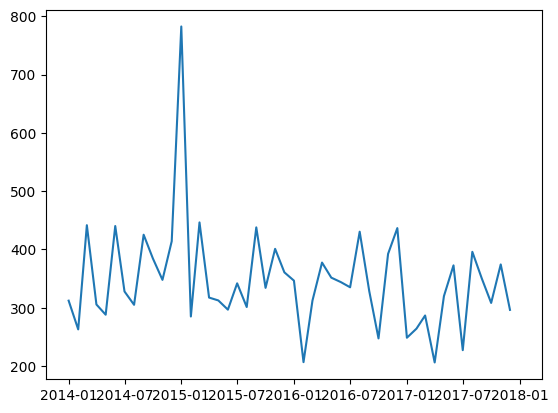

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing,SimpleExpSmoothing, Holt
#Exponential Smoothing
#fit model
model = ExponentialSmoothing(data_sales,trend='add',seasonal='add',seasonal_periods=12)
model_fit = model.fit()
#make prediction
yhat = model_fit.predict(len(data_sales))
print(yhat)
#plot
plt.plot(data_sales)
plt.plot(yhat, color='red')
plt.show()

Sarimax Model

In [ ]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(data_sales,order=(3,1,3))
results = model.fit()


In [ ]:
forecast = results.predict(start='2014-01-01',end='2018-12-01')
# We have data from 2014 to 2017 and we are predicting for the 2018(One more year we are forecasting)

In [ ]:
forecast

2014-01-01      0.000000
2014-02-01    309.499503
2014-03-01    287.630469
2014-04-01    328.364383
2014-05-01    330.093316
2014-06-01    340.264476
2014-07-01    337.296566
2014-08-01    327.120297
2014-09-01    349.472859
2014-10-01    353.040761
2014-11-01    342.442390
2014-12-01    353.941044
2015-01-01    363.649887
2015-02-01    382.971618
2015-03-01    423.999899
2015-04-01    425.153213
2015-05-01    340.543557
2015-06-01    329.555420
2015-07-01    384.659173
2015-08-01    396.863037
2015-09-01    345.895048
2015-10-01    326.517743
2015-11-01    381.184923
2015-12-01    413.075211
2016-01-01    362.513534
2016-02-01    327.317630
2016-03-01    359.105511
2016-04-01    373.898184
2016-05-01    340.102050
2016-06-01    340.104972
2016-07-01    376.169173
2016-08-01    377.078805
2016-09-01    341.147158
2016-10-01    346.826181
2016-11-01    378.336588
2016-12-01    353.213339
2017-01-01    329.881546
2017-02-01    373.528851
2017-03-01    379.930044
2017-04-01    316.348714


In [ ]:
data_sales

Order Date
2014-01-01    312.126250
2014-02-01    262.808286
2014-03-01    441.635030
2014-04-01    305.570654
2014-05-01    288.032792
2014-06-01    440.204187
2014-07-01    327.910636
2014-08-01    305.014437
2014-09-01    425.294300
2014-10-01    384.507719
2014-11-01    347.820527
2014-12-01    414.134682
2015-01-01    782.662773
2015-02-01    284.943091
2015-03-01    446.420821
2015-04-01    317.445409
2015-05-01    312.498350
2015-06-01    296.699192
2015-07-01    341.860500
2015-08-01    301.206006
2015-09-01    437.883717
2015-10-01    334.072875
2015-11-01    401.049773
2015-12-01    360.715925
2016-01-01    346.488318
2016-02-01    206.607947
2016-03-01    312.221756
2016-04-01    377.488286
2016-05-01    351.624070
2016-06-01    343.962421
2016-07-01    335.090231
2016-08-01    430.456286
2016-09-01    328.468445
2016-10-01    247.345354
2016-11-01    392.390479
2016-12-01    436.651369
2017-01-01    248.501333
2017-02-01    264.089900
2017-03-01    286.669600
2017-04-01    

RMSE Calculation

In [ ]:
#Calculate the rmse
from sklearn.metrics import mean_squared_error
#Give the same length for by indexing
actual = data_sales
predicted=forecast['2014-01-01':'2017-12-01']

RMSE of the model

In [ ]:
rmse = np.sqrt(mean_squared_error(actual,predicted))
print("Root Mean Squared Error",round(rmse,2))
#It means that predicted value is 99 above or below the actual value
#Actual value ranges from 0-800

Root Mean Squared Error 99.82


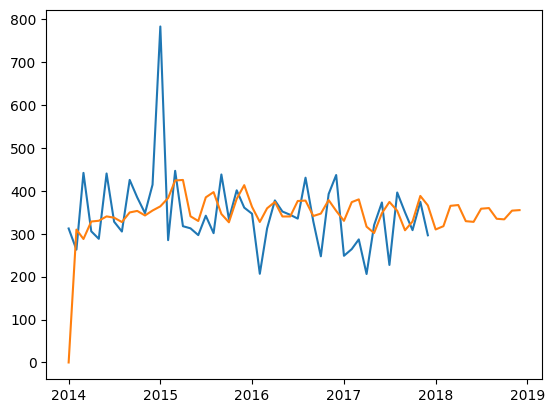

In [ ]:
plt.plot(data_sales)
plt.plot(forecast)
plt.show()
#Yellow is our prediction
#BLue is actual value
#A perfect prediction is where the orange is exactly on top of the blue line
#This is somewhat okay

In [ ]:
# Define range for p, d, q
p_values = range(0, 10)
d_values = range(0, 10)
q_values = range(0, 10)

# Initialize variables to store the best parameters
best_p, best_d, best_q = None, None, None
best_rmse = float('inf')

# Loop through all combinations of p, d, q
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                # Define and fit the SARIMAX model
                model = SARIMAX(data_sales, order=(p, d, q))
                model_fit = model.fit(disp=False)

                # Make predictions
                forecast = model_fit.predict(start='2014-01-01', end='2017-12-01')

                # Calculate RMSE
                rmse = np.sqrt(mean_squared_error(data_sales, forecast))

                # Check if this is the best combination based on RMSE
                if rmse < best_rmse:
                    best_rmse = rmse
                    best_p, best_d, best_q = p, d, q

                print(f'p={p}, d={d}, q={q}, RMSE={rmse}')
            except:
              continue

print(f'Best p, d, q: {best_p}, {best_d}, {best_q} with RMSE: {best_rmse}')

Best p, d, q: None, None, None with RMSE: inf


Prophet

In [ ]:
from prophet import Prophet

In [ ]:
df = pd.read_csv('/content/Super_Store.csv',encoding = 'cp1252')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [ ]:
cols_select = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit']

In [ ]:
df = data.drop(cols_select, axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  2121 non-null   object 
 1   Sales       2121 non-null   float64
dtypes: float64(1), object(1)
memory usage: 33.3+ KB


In [ ]:
df = df.sort_values('Order Date')

In [ ]:
df

,Order Date,Sales
845,1/1/2017,474.430
1707,1/1/2017,141.420
1708,1/1/2017,310.744
179,1/1/2017,48.896
181,1/10/2014,51.940
...,...,...
1524,9/9/2017,66.112
1152,9/9/2017,243.920
251,9/9/2017,17.024
250,9/9/2017,141.372


In [ ]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [ ]:
df = df.sort_values('Order Date')
df = df.groupby('Order Date')['Sales'].mean()

In [ ]:
df.describe()

count     889.000000
mean      345.338513
std       386.622612
min         1.988000
25%       107.502000
50%       240.728400
75%       435.999000
max      4297.644000
Name: Sales, dtype: float64

In [ ]:
m = Prophet()
m.fit(df)